# Rendimiento escolar

Modelo que precide el promedio final del año escolar para un alumno, con fin de identificar bajo desempeño académico.

Se sugiere explorar atributos ambientales del alumno para ver si pueden ser abstraídos en categorías latentes.

### 1. Preliminares

A continuación se definen las características del problema.

#### 1.1 Problema

Variable objetivo: Promedio final del año escolar.

El problema pertenece a uno de regresión, dado que la variable objetivo, definida como el promedio final del año escolar, presenta valores continuos.

Enunciado: promedio final del año escolar para un individuo explicado por atributos personales y ambientales.

#### 1.2 Atributos disponibles

Para explicar el promedio final del año escolar de un estudiante, tenemos disponibles los siguientes atributos:

* school: categórica. Especifica la escuela.
* sex: categórica. Define el sexo.
* age: numérica. Detalla la edad.
* address: categórica. Especifica la ubicación del estudiante (urbana o rural).
* famsize: categórica. Define el tamaño de la familia (menor o igual a 3, mayor a 3).
* Pstatus: categórica. Detalla el estado cohabitacional de los padres.
* Medu: categórica (label encoding). Presenta el nivel educacional de la madre.
* Fedu: categórica (label encoding). Presenta el nivel educacional del padre.
* Mjob: categórica. Especifica la ocupación de la madre.
* Fjob: categórica. Define la ocupación del padre.
* reason: categórica. Es la razón para escoger escuela.
* guardian: categórica. Define el apoderado.
* traveltime: categórica. Especifica el tiempo de viaje entre el hogal y la escuela. Presenta rangos.
* studytime: categórica. Detalla las horas semanales de estudio.
* failures: numérica. Especifica el número de clases reprobadas.
* schoolsup: binaria. Si recibe o no apoyo educacional del colegio.
* famsup: binaria. Si recibe apoyo educacional familiar.
* paid. binaria. Si recibe clases particulares pagadas o no.
* activities: binaria. Si realiza actividades extracurriculares o no.
* nursery: binaria. Define si asistió o no a la guardería infantil.
* higher: binaria. Si desea proseguir estudios superiores.
* internet: binaria. Si tienes acceso a internet desde el hogar.
* romantic: binaria. Si tiene una relación amorosa.
* famrel: categórica ordinal. Define la calidad de las relaciones familiares.
* freetime: categórica ordinal. Tiempo libre fuera del colegio.
* goout: categórical ordinal. Define si sale con amigos.
* Dalc: categórica ordinal. Consumo de alcohol en días de semana.
* Walc: categórica ordinal. Consumo de alcohol en fines de semana.
* health: categórica ordinal. Estado de salud actual.
* absences: numérica. Cantidad de ausencias escolares.

En cuanto a las variables objetivo:

* G1: numérica. Notas durante el primer semestre (V.O 1 modelo descriptivo).
* G2: numérica. Notas durante el segundo semestre (V.O 2 modelo descriptivo).
* G3: numérica. Promedio final (V.O 3 modelo descriptivo, y V.O modelo predictivo).

#### 1.3 Métricas para medir desempeño

Para medir el desempeño de nuestro modelo utilizaremos dos medidas:

* Error cuadrático medio (MSE): representa la expectativa del error cuadrático, donde este se define a partir de las distancias entre el valor estimado y el valor real de la variable objetivo. Nos permite medir la calidad de nuestro ajuste, e idealmente queremos que sea pequeño.

* r2_score: representa la proporción porcentual de la varianza total de la variable objetivo que es explicada por los atributos agregados al modelo.

### 2. Aspectos computacionales

#### 2.1 Librerias a utilizar

Las librerias y versiones utilizadas son:

* numpy=1.23.0
* pandas=1.4.3
* matplotlib=3.5.2
* seaborn=11.0
* warnings
* sklearn=0.22
* factor_analyzer=0.4.0
* statsmodels=0.11.0

Además, trabajaremos con la versión de Python 3.8.3.

#### 2.2 Proceso tentativo recodificación de atributos

Se hará un análisis exploratorio tanto de la variable objetivo como de sus atributos donde:

* Se identificará la presencia de valores nulos, perdidos o caracteres incorrectos, y serán eliminados del modelo ya que nos generan problemas en la estimación. En esta etapa, se utilizará la función importada "calidad_datos" que nos permite tener una perspectiva global.

* Estudio de dimensionalidad. Se aplicará un estudio de latencia para identificar posibles agrupaciones entre variables.

* Transformación de variables categóricas mediante el uso de binary encoding.

* Estudio de la escala es la cual están definidas las variables numéricas. Si existen diferencias muy grandes en la dimensionalidad de los números se aplicará una estandarización con StandardScaler() de Sklearn.

* Transformación de variables binarias a 1 y 0. Se considerará como 1 la categoría minoritaria.

* Exploración de correlaciones entre atributos y variable objetivo. La idea es identificar atributos que se correlacionan fuertemente y débilmente, para considerar excluirlas del modelo.

#### 2.3 Importación de librerias

In [65]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.formula.api as smf

# machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# para detectar factores latentes
import factor_analyzer as factor

from calidad_datos import calidad_datos
from graficos import cross_plot

from functions import model_formula

plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["figure.dpi"] = 70
warnings.filterwarnings('ignore')

### 3. Descripción

In [66]:
# importación de datos
df = pd.read_csv('students.csv', sep='|', encoding='latin-1').drop('Unnamed: 0', axis=1)

#### 3.0 Calidad de los datos

In [67]:
# lista nulos
null_list = ['sem validade', 'zero', 'nulidade']

In [68]:
# transformacion incorrecto formato de variables
for col in ['age', 'goout', 'health']:
    df[col] = df[col].str.replace('"', "").replace(null_list, [np.nan, np.nan, np.nan]).astype('float')

In [69]:
# reemplazo de valores nulos en otras variables

for col in df.columns:
    if col not in ['age', 'goout', 'health', 'G2']:
        df[col] = df[col].replace(null_list, [np.nan, np.nan, np.nan])
    if col in ['failures', 'absences', 'G1', 'G3']:
        df[col] = df[col].astype(float)

In [70]:
calidad = calidad_datos(df)
calidad

,tipo,nulos,porc_nulos,ceros,porc_ceros,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dist_IQR,limit_inf,limit_sup,outliers
G2,int64,0,0.000000,13,0.032911,395,NaN,NaN,NaN,10.7139,3.7615,0,9,11,13,19,4,3,19,13
failures,float64,5,0.012658,308,0.779747,390,NaN,NaN,NaN,0.335897,0.746883,0,0,0,0,3,0,0,0,82
goout,float64,5,0.012658,0,0.000000,390,NaN,NaN,NaN,3.10256,1.11763,1,2,3,4,5,2,-1,7,0
health,float64,4,0.010127,0,0.000000,391,NaN,NaN,NaN,3.57033,1.3773,1,3,4,5,5,2,0,8,0
G3,float64,3,0.007595,37,0.093671,392,NaN,NaN,NaN,10.4464,4.56801,0,8,11,14,20,6,-1,23,0
age,float64,4,0.010127,0,0.000000,391,NaN,NaN,NaN,16.6982,1.27941,15,16,17,18,22,2,13,21,1
G1,float64,4,0.010127,0,0.000000,391,NaN,NaN,NaN,10.9335,3.32059,3,8,11,13,19,5,0.5,20.5,0
absences,float64,4,0.010127,113,0.286076,391,NaN,NaN,NaN,5.73146,8.02509,0,0,4,8,75,8,-12,20,15
Walc,object,5,0.012658,0,0.000000,390,5,1,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Dalc,object,3,0.007595,0,0.000000,392,5,1,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


De acuerdo a la tabla anterior se identifica:
* Las clases se encuentran balanceadas
* No existen porcentajes altos de nulos en ninguna de las variables

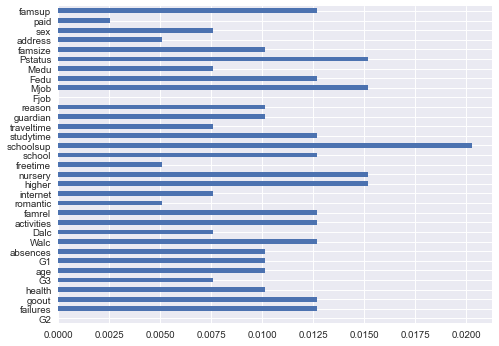

In [71]:
# grafica que visualiza el porcentaje de nulos
calidad['porc_nulos'].plot(kind='barh')

#### 3.1 Inspección visual vector objetivo

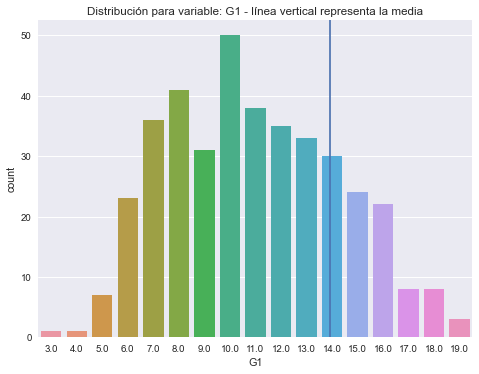

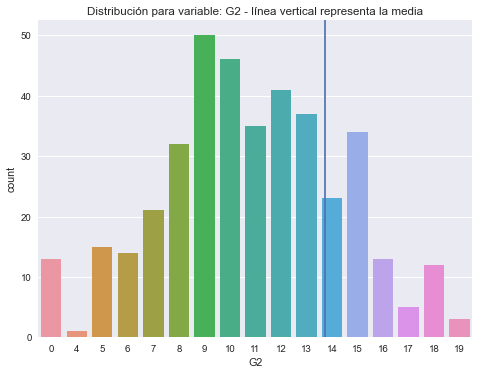

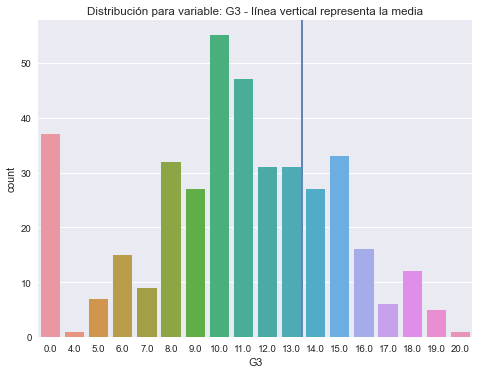

In [72]:
for col in ['G1', 'G2', 'G3']:
    sns.countplot(x=df[col])
    plt.axvline(df[col].mean())
    plt.title(f'Distribución para variable: {col} - línea vertical representa la media')
    plt.show()

De las distribuciones anteriores, tanto para las variables de nuestro modelo descriptivo G1 y G2; como para la variable del modelo predictivo G3, se visualiza que:
* La media de los promedios se encuentra cercana a 14
* G2 y G3 presentan individuos con promedio 0, se podría considerar eliminar dichas muestras del modelo ya que tecnicamente esto es un error
* La mayor cantidad de los alumnos presentan un promedio inferior a la media

#### 3.2 Visualizaciónes entre atributos y/o variable objetivo

Text(0.5, 1.0, 'Escuela vs Promedio Final')

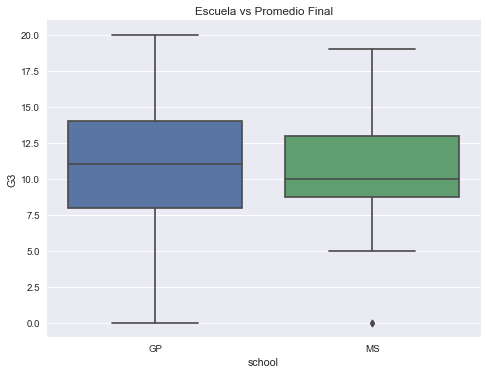

In [73]:
# relacion entre escuela y promedio final
sns.boxplot(x='school', y='G3', data=df)
plt.title('Escuela vs Promedio Final')

Identificamos que la escuela MS posee un espectro de notas con mayor concentración, pero se podría esperar que la escuela GP presente mejores promedios. Esto puede ser visualizado a partir de la mediana en el boxplot.

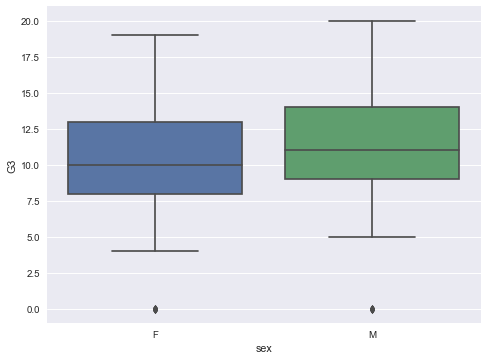

In [74]:
sns.boxplot(x='sex', y='G3', data=df)

El sexo no demuestra grandes diferencias para explicar el promedio final, pero si permite identificar que los hombres, en promedio, tienen promedios mayores que las mujeres.

Text(0.5, 1.0, 'Ocupación madre vs promedio final')

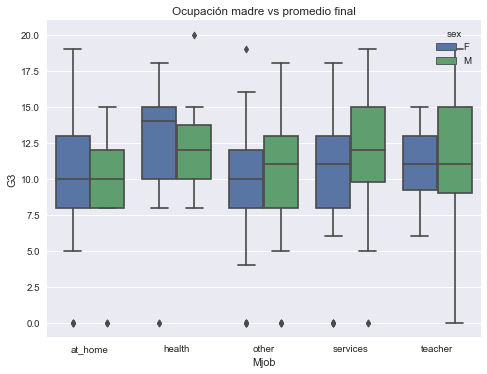

In [75]:
# relacion ocupación de la madre en el promedio
sns.boxplot(x='Mjob', y='G3', hue='sex', data=df)
plt.title('Ocupación madre vs promedio final')

Hijos/as de mujeres que trabajan en el área de la salud demuestran mejores promedios, aunque no se presentan grandes diferencias entre las ocupaciones, podría ser una variable que no tenga mucho peso en los coeficientes a estimar.

Text(0.5, 1.0, 'Ocupación padre vs promedio final')

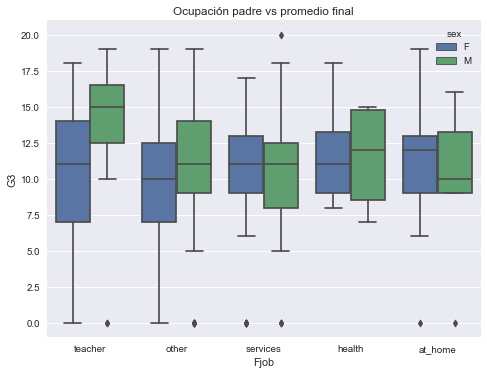

In [76]:
# relacion ocupación de la padre en el promedio
sns.boxplot(x='Fjob', y='G3', hue='sex', data=df)
plt.title('Ocupación padre vs promedio final')

Se identifican diferencias importantes entre hijos de hombres que se desarrollan como profesores, donde destancan por sus mejores promedios finales.

Text(0.5, 1.0, 'Tiempo de estudio vs promedio final')

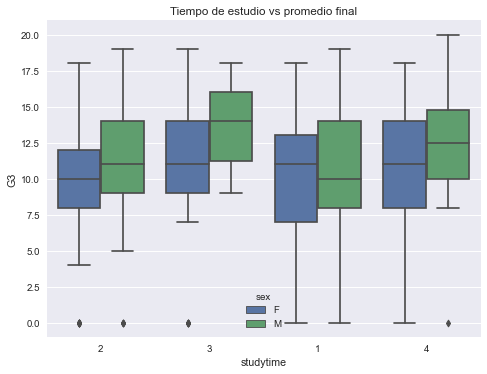

In [77]:
sns.boxplot(x='studytime', y='G3', hue='sex', data=df)
plt.title('Tiempo de estudio vs promedio final')

Visualizamos a priori que los indivudios con 5-10 horas de estudio semanales muestran mejores promedios finales. Visualizamos también que existen observaciones con promedio final 0, las cuales debemos considerar si eliminarlas del modelo ya que no demuestran sentido de estudio y se espera puedan ser errores del conjunto de datos inicial.

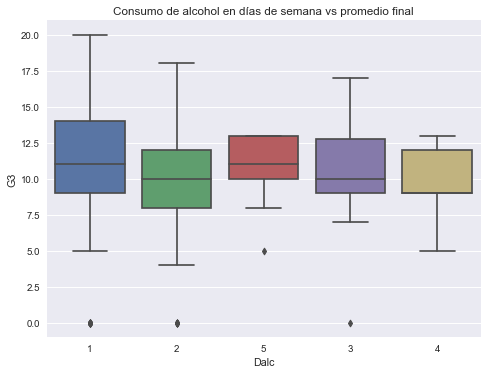

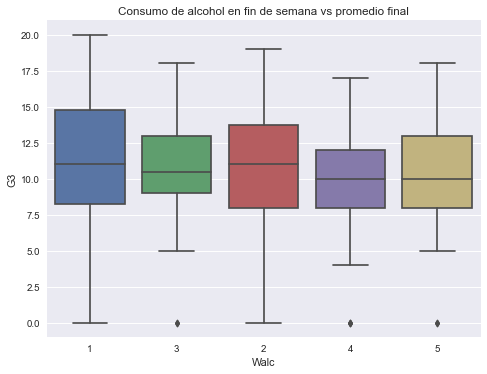

In [78]:
alc_dict = {
    'Dalc': 'días de semana',
    'Walc': 'fin de semana'
}

for col in ['Dalc', 'Walc']:
    sns.boxplot(x=col, y='G3', data=df)
    plt.title(f'Consumo de alcohol en {alc_dict[col]} vs promedio final')
    plt.show()

Se especifica que individuos con alto consumo de alcohol durante días de semana presentan mayores promedios, y quienes tienen bajos niveles de consumo de alcohol los fines de semana presentan una mediana mayor. A priori genera ruido.

#### Análisis de correlaciones

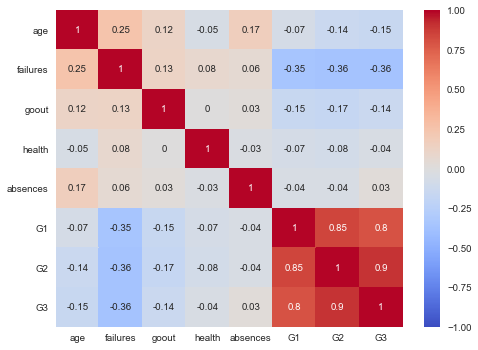

In [79]:
sns.heatmap(round(df.corr(), 2), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

En la gráfica anterior se identifica:
* Alta correlación entre las variables G1, G2, y G3. Esto tiene sentido, ya que las tres especifican promedios, y además G3 es calculada en base a G1 y G2
* Una tendencia general a presentar bajas correlaciones entre variables
* Existen variables como: failures y schoolsup; que lideran las correlaciones con los promedios (~0.3). Sin embargo, las correlaciones son bajas

#### 3.3 Análisis factorial

En esta sección buscamos agrupar la batería de preguntas asociadas a factores ambientales (de famrel a health).

In [80]:
df = df.dropna()

In [81]:
# seleccionamos preguntas ambientales
df_amb = df.loc[:, ['famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']]

In [82]:
for col in df_amb.columns:
    try:
        df_amb[col] = df_amb[col].astype(int)
    except:
        df_amb[col] = df_amb[col].astype(float)

#### Supuestos

1. Realizamos la prueba de esfericidad de Bartlett. Esta prueba tiene como hipótesis: 

* H0: la matriz de correlaciones entre las variables es una matriz identidad
* H1: la matriz de correlaciones no es una matriz identidad

In [83]:
# calculamos
factor.calculate_bartlett_sphericity(df_amb)

(264.4978629665065, 1.2695430067794125e-47)

De acuerdo a los resultados anteriores identificamos un valor chi cuadrado de 264.5 y un valor p menor a 0.05 (=0.00..). Por lo tanto, podemos afirmar que existe covarianza significativa entre las variables.

2. Prueba Kaiser-Meyer-Olkin: Especifica si las correlaciones parciales entre dos items son cercanas a cero. 

In [84]:
factors_ = factor.calculate_kmo(df_amb)[0]

In [85]:
pd.DataFrame(data={
    'variable': df_amb.columns,
    'KMO': factors_
})

,variable,KMO
0,famrel,0.501733
1,freetime,0.576923
2,goout,0.616840
3,Dalc,0.586642
4,Walc,0.555409
5,health,0.592659


De acuerdo a los resultados anteriores, como los KMO de variables individuales son menores a 0.7, e incluso el KMO global también es menor a 0.7, entonces NO existe al menos un factor latente sobre el cual se puedan abstraer las variables ambientales.

### 4. Modelación descriptiva

In [86]:
# eliminamos individuos que presentan valores perdidos
df = df.dropna()

Primero que todo, transformamos variables categoricas utilizando Binary Encoding.

In [87]:
binary_dict = {'yes': 1, 'no': 0}

In [88]:
for col in ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    df[col] = df[col].replace(binary_dict)

for col in ['goout', 'health']:
    df[col] = df[col].astype(str)

for col in ['G1', 'G3']:
    df[col] = df[col].astype(int)

In [89]:
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies.columns = [col.replace('-', '_') for col in df_dummies.columns]

In [90]:
# reemplazo de nombres dummies que se generaron a partir de variables float
df_dummies.columns = df_dummies.columns.str.replace('.0', '')

Segundo, estimamos descriptivamente los promedios semestrales (G1, G2) haciendo uso de OLS (mínimos cuadrados ordinarios):

In [91]:
# eliminamos V.O's de acuerdo al promedio a estimar
df_dummies_g1 = df_dummies.drop(['G2', 'G3'], axis=1)
df_dummies_g2 = df_dummies.drop(['G1', 'G3'], axis=1)

In [92]:
# construimos formula para el modelo OLS de statsmodels
base_formula_g1_1 = model_formula(df_dummies_g1, var_obj='G1')
base_formula_g2_1 = model_formula(df_dummies_g2, var_obj='G2')

##### OLS - G1

In [93]:
# ajustamos
model_g1_1 = smf.ols(base_formula_g1_1, data=df_dummies_g1).fit()
model_g1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     2.439
Date:                Fri, 08 Jul 2022   Prob (F-statistic):           6.31e-07
Time:                        21:01:14   Log-Likelihood:                -660.62
No. Observations:                 284   AIC:                             1457.
Df Residuals:                     216   BIC:                             1705.
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            14.3756      6.206      2.317      0.021       2.144      26.607
age                   0.1333      0.189      0.706      0.481      -0.239       0.505
failures             -0.9565      0.292     -3.272      0.001      -1.533      -0.380
schoolsup            -1.5272      0.578     -2.640      0.009      -2.667      -0.387
famsup               -1.2262      0.421     -2.914      0.004      -2.056      -0.397
paid                 -0.0497      0.430     -0.116      0.908      -0.897       0.797
activities           -0.6551      0.390     -1.681      0.094      -1.423       0.113
nursery              -0.0424      0.474     -0.089      0.929      -0.976       0.891
higher                0.9995      0.963      1.038      0.301      -0.899       2.898
internet              0.1089      0.527      0.207      0.836      -0.930       1.148
romantic             -0.0402      0.436     -0.092      0.927      -0.899       0.818
absences              0.0068      0.025      0.269      0.788      -0.043       0.056
school_MS            -0.5294      0.689     -0.768      0.443      -1.887       0.828
sex_M                 0.6612      0.447      1.480      0.140      -0.219       1.542
address_U            -0.0081      0.520     -0.016      0.988      -1.033       1.017
famsize_LE3           0.3579      0.465      0.770      0.442      -0.558       1.273
Pstatus_T            -0.2071      0.695     -0.298      0.766      -1.578       1.163
Medu_1               -1.5261      3.198     -0.477      0.634      -7.829       4.777
Medu_2               -1.6431      3.158     -0.520      0.603      -7.867       4.581
Medu_3               -2.2090      3.160     -0.699      0.485      -8.438       4.020
Medu_4               -1.0723      3.199     -0.335      0.738      -7.378       5.233
Fedu_1               -3.7069      3.092     -1.199      0.232      -9.801       2.387
Fedu_2               -2.9088      3.137     -0.927      0.355      -9.092       3.274
Fedu_3               -3.3803      3.122     -1.083      0.280      -9.535       2.774
Fedu_4               -2.8768      3.176     -0.906      0.366      -9.136       3.383
Mjob_health           0.6816      0.965      0.707      0.481      -1.220       2.583
Mjob_other           -0.6136      0.614     -0.999      0.319      -1.824       0.597
Mjob_services         0.3671      0.689      0.533      0.595      -0.992       1.726
Mjob_teacher         -1.0482      0.920     -1.139      0.256      -2.862       0.766
Fjob_health          -0.3347      1.328     -0.252      0.801      -2.952       2.283
Fjob_other           -0.7305      1.012     -0.722      0.471      -2.726       1.265
Fjob_services        -0.3428      1.017     -0.337      0.736      -2.347       1.661
Fjob_teacher          1.1229      1.246      0.901      0.368      -1.332

Dado que el modelo OLS que busca predecir el promedio del primer semestre (G1) es significativo al 95% de confianza dado que el la probabilidad "p" del estadístico F es menor a 0.05; y además, identificamos que con las variables incorporadas al modelo explicamos en un 43% G1, entonces nuestro modelo es calificado como significativo.

Eliminamos variables que no son significativas (dejamos solo las significativas). Esto es: variables que contienen el cero en su intervalo de confianza.

In [94]:
sig_g1 = ['failures', 'schoolsup', 'famsup', 'studytime_3', 'studytime_4', 'freetime_2', 'freetime_4', 'freetime_5', 'goout_3', 'goout_4', 'goout_5', 'health_3', 'health_4', 'health_5', 'G1']
df_sig_g1 = df_dummies_g1.loc[:, sig_g1]

Volvemos a predecir G1 con variables significativas:

In [95]:
base_formula_g1_2 = model_formula(df_sig_g1, var_obj='G1')

In [96]:
model_g1_2 = smf.ols(base_formula_g1_2, data=df_sig_g1).fit()
model_g1_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     7.832
Date:                Fri, 08 Jul 2022   Prob (F-statistic):           6.77e-14
Time:                        21:01:14   Log-Likelihood:                -692.07
No. Observations:                 284   AIC:                             1414.
Df Residuals:                     269   BIC:                             1469.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.7422      0.573     22.246      0.000      11.614      13.870
failures       -1.2106      0.244     -4.955      0.000      -1.692      -0.730
schoolsup      -1.7377      0.512     -3.396      0.001      -2.745      -0.730
famsup         -0.6839      0.354     -1.934      0.054      -1.380       0.012
studytime_3     1.0939      0.460      2.376      0.018       0.187       2.000
studytime_4     1.0993      0.699      1.572      0.117      -0.278       2.476
freetime_2      1.4646      0.483      3.030      0.003       0.513       2.416
freetime_4      0.7665      0.425      1.803      0.073      -0.070       1.603
freetime_5      2.4313      0.617      3.943      0.000       1.217       3.645
goout_3        -0.4096      0.429     -0.955      0.340      -1.254       0.434
goout_4        -1.2792      0.515     -2.485      0.014      -2.293      -0.266
goout_5        -2.0543      0.609     -3.375      0.001      -3.253      -0.856
health_3       -1.5122      0.525     -2.880      0.004      -2.546      -0.478
health_4       -1.4002      0.561     -2.497      0.013      -2.504      -0.296
health_5       -1.1565      0.482     -2.400      0.017      -2.105      -0.208
==============================================================================
Omnibus:                       10.145   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                5.681
Skew:                           0.148   Prob(JB):                       0.0584
Kurtosis:                       2.373   Cond. No.                         8.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Identificamos que nuestro modelo mantiene su significancia al nivel 95% de confianza, pero disminuye la explicacion de los atributos sobre la variable explicada. Esto es normal ya que eliminamos del modelo la gran mayoría de variables que no demostraron significancia en el primer modelo.

Dado los resultados anteriores, para el modelo predictivo eliminaremos las variables que no demostraron significancia. La lógica del proceso se detalla mas adelante.

##### OLS - G2

In [97]:
# ajuste G2
model_g2_1 = smf.ols(base_formula_g2_1, data=df_dummies_g2).fit()
model_g2_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     2.127
Date:                Fri, 08 Jul 2022   Prob (F-statistic):           2.33e-05
Time:                        21:01:14   Log-Likelihood:                -708.86
No. Observations:                 284   AIC:                             1554.
Df Residuals:                     216   BIC:                             1802.
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            16.0212      7.355      2.178      0.030       1.525      30.517
age                   0.0116      0.224      0.052      0.959      -0.429       0.452
failures             -0.9427      0.346     -2.721      0.007      -1.626      -0.260
schoolsup            -0.8114      0.686     -1.184      0.238      -2.163       0.540
famsup               -1.3213      0.499     -2.650      0.009      -2.304      -0.338
paid                  0.4399      0.509      0.864      0.389      -0.564       1.444
activities           -0.4513      0.462     -0.977      0.330      -1.362       0.459
nursery               0.1418      0.561      0.253      0.801      -0.965       1.248
higher                1.1081      1.141      0.971      0.333      -1.142       3.358
internet              0.6144      0.625      0.984      0.326      -0.617       1.845
romantic             -0.5679      0.516     -1.100      0.273      -1.585       0.450
absences             -0.0010      0.030     -0.034      0.973      -0.060       0.058
school_MS             0.0655      0.816      0.080      0.936      -1.544       1.675
sex_M                 0.6801      0.529      1.285      0.200      -0.363       1.724
address_U             0.7835      0.616      1.271      0.205      -0.431       1.998
famsize_LE3           0.4015      0.551      0.729      0.467      -0.684       1.487
Pstatus_T            -0.5563      0.824     -0.675      0.500      -2.181       1.068
Medu_1               -1.7971      3.790     -0.474      0.636      -9.267       5.673
Medu_2               -2.0008      3.743     -0.535      0.593      -9.377       5.376
Medu_3               -2.4227      3.745     -0.647      0.518      -9.805       4.960
Medu_4               -1.0769      3.791     -0.284      0.777      -8.550       6.396
Fedu_1               -5.1769      3.664     -1.413      0.159     -12.399       2.045
Fedu_2               -4.3871      3.718     -1.180      0.239     -11.715       2.941
Fedu_3               -5.3195      3.701     -1.437      0.152     -12.613       1.974
Fedu_4               -4.9762      3.764     -1.322      0.188     -12.395       2.442
Mjob_health           0.9119      1.143      0.798      0.426      -1.341       3.165
Mjob_other           -0.0085      0.728     -0.012      0.991      -1.443       1.426
Mjob_services         0.6119      0.817      0.749      0.455      -0.998       2.222
Mjob_teacher         -0.8605      1.091     -0.789      0.431      -3.011       1.290
Fjob_health           0.3878      1.574      0.246      0.806      -2.714       3.490
Fjob_other            0.2346      1.200      0.196      0.845      -2.130       2.599
Fjob_services         0.9774      1.205      0.811      0.418      -1.397       3.352
Fjob_teacher          1.5105      1.476      1.023      0.307      -1.399

Nuestro modelo para G2 (promedio segundo semestre) demuestra ser significativo al 95% de confianza, dado que la probabilidad estadística del estimador es menor a 0.05. Por otro lado, los atributos incorporados permiten explicar un 39.8% de G2.

Seleccionamos variables significativas y volvemos a hacer un fit por OLS:

In [98]:
sig_g2 = ['failures', 'famsup', 'freetime_5', 'goout_4', 'goout_5', 'Walc_5', 'health_3', 'health_4', 'health_5', 'G2']
df_sig_g2 = df_dummies_g2.loc[:, sig_g2]

In [99]:
base_formula_g2_2 = model_formula(df_sig_g2, var_obj='G2')

In [100]:
model_g2_2 = smf.ols(base_formula_g2_2, data=df_sig_g2).fit()
model_g2_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     8.152
Date:                Fri, 08 Jul 2022   Prob (F-statistic):           1.00e-10
Time:                        21:01:14   Log-Likelihood:                -747.12
No. Observations:                 284   AIC:                             1514.
Df Residuals:                     274   BIC:                             1551.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.4504      0.558     24.107      0.000      12.352      14.549
failures      -1.3950      0.292     -4.769      0.000      -1.971      -0.819
famsup        -0.7501      0.418     -1.794      0.074      -1.573       0.073
freetime_5     2.0439      0.705      2.899      0.004       0.656       3.432
goout_4       -1.5242      0.525     -2.903      0.004      -2.558      -0.491
goout_5       -2.6483      0.710     -3.731      0.000      -4.046      -1.251
Walc_5         1.0040      0.887      1.132      0.259      -0.743       2.751
health_3      -2.1496      0.632     -3.401      0.001      -3.394      -0.905
health_4      -1.9592      0.670     -2.923      0.004      -3.279      -0.639
health_5      -1.6572      0.577     -2.873      0.004      -2.793      -0.521
==============================================================================
Omnibus:                       13.380   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.024
Skew:                          -0.494   Prob(JB):                     0.000901
Kurtosis:                       3.458   Cond. No.                         7.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El modelo mantiene su significancia, aunque el R2 disminuye, demostrando una menor explicacion del promedio G2. Además, existen variables que demostraron no ser significativas en este segundo modelo.

En cuanto a los resultados, se mantendrán para el modelo predictivo solo aquellas variables que demuestran significancia luego de los dos modelos OLS estudiados.

#### Próxima etapa

Para el análisis predictivo del promedio final anual G3, se utilizará la concatenación de variables significativas entre los modelos g1_2 y g2_2, los cuales representan modelos con los atributos representativos del primer modelo para cada promedio (s1, s2).

Posterior a ello, se procederá a dividir el conjunto de datos en conjuntos de entrenamiento y testeo. Para ello, se utilizará el módulo train_test_split de Scikit-Learn.

Una vez divididos los conjuntos de datos, identificaremos la necesidad de estandarizar con StandardScaler. Esto solo será realizado en caso que existan variables numéricas con valores muy altos.

Finalmente, ajustaremos el modelo, realizaremos predicciones, verificaremos la significancia de nuestro modelo a partir de los coeficientes y estadísticos presentados. Cabe destacar que se utilizará una regresión lineal para el ajuste.

Nota: no realizamos un modelo descriptivo sobre la variable objetivo G3 ya que al ser calculada a partir de las dos anteriores (G1 y G2), inferimos que la relación conjunta entre los predictores significativos de estas últimas deberían estar correlacionados a los resultados para G3.

### 5. Modelación predictiva

In [101]:
def report_scores(y_predict, y_validate):
    """Calcula el error cuadrático medio y el r2 score entre dos vectores. El primero, el vector de valores predecidos por el
    conjunto de prueba, y el segundo, el vector objetivo original.

    Args:
        y_predict (vector): vector de valores predecidos
        y_validate (vector): vector de valores verdaderos
    """
    mse = mean_squared_error(y_validate, y_predict)
    r2 = r2_score(y_validate, y_predict).round(2)
    print(f'Error cuadrático medio: {mse}')
    print(f'R2: {r2}')

#### Modelo 1

In [102]:
# seleccionamos variables para utilizar en el modelo
sig_vars = ['failures', 'schoolsup', 'studytime_3', 'freetime_2', 'freetime_5', 'goout_4', 'goout_5', 'health_3', 'health_4', 'health_5', 'G3']
df_pred = df_dummies.loc[:, sig_vars]

In [103]:
# separamos variable objetivo del conjunto de datos
mat_atr = df_pred.drop('G3', axis=1)
vec_obj = df_pred.loc[:, 'G3']

In [104]:
# split de conjuntos de entrenamiento vs prueba

X_train, X_test, y_train, y_test = train_test_split(mat_atr, vec_obj, test_size=.33, random_state=1238)

In [105]:
# ajustamos modelo sin alterar hiperparámetros
modelo_1 =  LinearRegression(fit_intercept=True).fit(X_train, y_train)

In [106]:
# predecimos la V.O
y_hat = modelo_1.predict(X_test)

In [108]:
# obtenemos métricas
report_scores(y_hat, y_test)

Error cuadrático medio: 16.456976333470898
R2: 0.19


A partir de los resultados anteriores, se obtiene un MSE de 16.45, y por otro lado, los atributos incorporados al modelo explican en un 19% el promedio final anual.

#### Modelo 2

Dado que failures es la única variable numérica que no es binaria, generamos un nuevo modelo con su integración cuadrática. Esto es, la elevaremos al cuadrado y realizaremos predicciones.

In [ ]:
# separamos variable objetivo del conjunto de datos
mat_atr = df_pred.drop('G3', axis=1)
vec_obj = df_pred.loc[:, 'G3']

In [ ]:
# agregamos failures al cuadrado
mat_atr1 = mat_atr.copy()
mat_atr1['failures_2'] = mat_atr1['failures']**2

In [ ]:
# split de conjuntos de entrenamiento vs prueba

X_train1, X_test1, y_train1, y_test1 = train_test_split(mat_atr1, vec_obj, test_size=.33, random_state=1234)

In [ ]:
# ajustamos modelo sin alterar hiperparámetros
modelo_2 =  LinearRegression(fit_intercept=True).fit(X_train1, y_train1)

In [ ]:
# predecimos la V.O
y_hat1 = modelo_2.predict(X_test1)

In [ ]:
# obtenemos métricas
report_scores(y_hat1, y_test1)

Error cuadrático medio: 20.73231988684381
R2: 0.17


A partir del resultado anterior identificamos que la interacción cuadrática de failures no aporta en la explicación del promedio final anual. De echo, aumenta el error cuadrático medio de 16.45 a 20.73, y disminuye la explicación del promedio final anual en un 2%. Dado ello, mantenemos como modelo base el modelo 1.